In [25]:
%load_ext autoreload
%autoreload 2
from utils import *
from IPython.display import display, HTML
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#CollectASECount()
#SEVERE_IMPACT=SYNONYMOUS_VARIANT;SEVERE_GENE=ENSG00000057252;SEVERE_GENE_NAME=SOAT1

In [3]:
GTEX_ASE = pd.read_csv("data/GTEX_ASE.Anno.tsv", delimiter="\t")

In [4]:
set(GTEX_ASE["SEVERE_IMPACT"].values)
LGDs = ['FRAMESHIFT_VARIANT', 'SPLICE_ACCEPTOR_VARIANT', 'SPLICE_DONOR_VARIANT', 'STOP_GAINED']

In [5]:
GTEX_ASE_LGD = GTEX_ASE[GTEX_ASE["SEVERE_IMPACT"].isin(LGDs)]
GENES_WITH_LGD = set(GTEX_ASE_LGD["SEVERE_GENE_NAME"].values)
GTEX_ASE_SYN = GTEX_ASE[(GTEX_ASE["SEVERE_IMPACT"]=="SYNONYMOUS_VARIANT") & 
                        (GTEX_ASE["SEVERE_GENE_NAME"].isin(GENES_WITH_LGD))]

In [6]:
GTEX_ASE_LGD.to_csv("NMD_model/GTEx.ASE.LGD.tsv", index=False, sep="\t")
GTEX_ASE_SYN.to_csv("NMD_model/GTEX_ASE.SYN.tsv", index=False, sep="\t")

In [7]:
Samples = pd.read_csv("../data/GTEx/GTEx_v7_Annotations_SampleAttributesDS.txt", delimiter="\t")

In [8]:
Samples.head(2)

,SAMPID,SMATSSCR,SMCENTER,SMPTHNTS,SMRIN,SMTS,SMTSD,SMUBRID,SMTSISCH,SMTSPAX,...,SME1ANTI,SMSPLTRD,SMBSMMRT,SME1SNSE,SME1PCTS,SMRRNART,SME1MPRT,SMNUM5CD,SMDPMPRT,SME2PCTS
0,GTEX-1117F-0003-SM-58Q7G,NaN,B1,NaN,NaN,Blood,Whole Blood,13756,1188.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GTEX-1117F-0003-SM-5DWSB,NaN,B1,NaN,NaN,Blood,Whole Blood,13756,1188.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
print(sorted(list(set(Samples["SMTS"].values))))

['Adipose Tissue', 'Adrenal Gland', 'Bladder', 'Blood', 'Blood Vessel', 'Bone Marrow', 'Brain', 'Breast', 'Cervix Uteri', 'Colon', 'Esophagus', 'Fallopian Tube', 'Heart', 'Kidney', 'Liver', 'Lung', 'Muscle', 'Nerve', 'Ovary', 'Pancreas', 'Pituitary', 'Prostate', 'Salivary Gland', 'Skin', 'Small Intestine', 'Spleen', 'Stomach', 'Testis', 'Thyroid', 'Uterus', 'Vagina']


In [9]:
for i, row in Samples.iterrows():
    SAMPID = row["SAMPID"]
    DONER = SAMPID.split("-")[1]
    SMTS = row["SMTS"]
    SMTSD = row["SMTSD"]

In [10]:
GTEX_ASE_LGD.head()

,SAMPLE,ID,INFO,NREF,NALT,SEVERE_IMPACT,SEVERE_GENE,SEVERE_GENE_NAME
52,GTEX-T6MN-0226-SM-5S2SO,snp_7_100552738,7_100552738_C_T,8,0,STOP_GAINED,ENSG00000169894,MUC3A
99,GTEX-S32W-0326-SM-5S2T4,snp_8_52733231,8_52733231_G_A,36,0,STOP_GAINED,ENSG00000168300,PCMTD1
182,GTEX-S32W-0726-SM-5S2T3,snp_8_52733231,8_52733231_G_A,23,0,STOP_GAINED,ENSG00000168300,PCMTD1
312,GTEX-S32W-2226-SM-5S2S7,snp_8_52733231,8_52733231_G_A,8,0,STOP_GAINED,ENSG00000168300,PCMTD1
451,GTEX-WFON-0426-SM-5S2T1,snp_21_44323720,21_44323720_C_T,13,12,STOP_GAINED,ENSG00000160194,NDUFV3


In [11]:
GENES_WITH_LGD = list(GENES_WITH_LGD)
print(len(GENES_WITH_LGD))

1543


In [46]:
GTEX_ASE_SYN.head()

,SAMPLE,ID,INFO,NREF,NALT,SEVERE_IMPACT,SEVERE_GENE,SEVERE_GENE_NAME
10,GTEX-T6MN-0226-SM-5S2SO,snp_12_53647177,12_53647177_T_G,12,0,SYNONYMOUS_VARIANT,ENSG00000182544,MFSD5
11,GTEX-T6MN-0226-SM-5S2SO,snp_12_53647373,12_53647373_T_C,14,8,SYNONYMOUS_VARIANT,ENSG00000182544,MFSD5
18,GTEX-T6MN-0226-SM-5S2SO,snp_2_29092679,2_29092679_T_C,18,37,SYNONYMOUS_VARIANT,ENSG00000171103,TRMT61B
19,GTEX-T6MN-0226-SM-5S2SO,snp_2_29092850,2_29092850_G_T,21,42,SYNONYMOUS_VARIANT,ENSG00000171103,TRMT61B
22,GTEX-T6MN-0226-SM-5S2SO,snp_2_135711516,2_135711516_C_T,34,44,SYNONYMOUS_VARIANT,ENSG00000082258,CCNT2


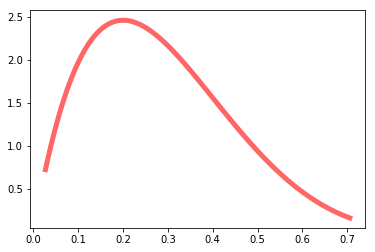

In [55]:
from scipy.stats import beta
fig, ax = plt.subplots(1, 1)
a, b = 2,5
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)
ax.plot(x, beta.pdf(x, a, b), 'r-', lw=5, alpha=0.6, label='beta pdf')

In [18]:
P = 1e-6
Q = math.log10(P)

In [19]:
Q

-6.0

In [45]:
scipy.stats.halfcauchy.cdf(10)

0.9365489651388929

In [24]:
2 ** 2

4

In [26]:
print(reparameter(0.459147,0.142321))

(22.668029953424497, 26.701844952486894)


In [34]:
mu = lambda a,b : a/(a+b)
sigma = lambda a,b :1/math.sqrt(a+b)

In [36]:
print(mu(5.17, 6.09), sigma(5.17, 6.09))
print(mu(15.53,30.16), sigma(15.53,30.16))

0.4591474245115453 0.29800997754107494
0.3398993215145546 0.1479412967049349


In [39]:
scipy.stats.beta.std(15.53,30.16)

0.06932155585067272

In [42]:
scipy.stats.uniform.logpdf(0.5)

0.0